In [7]:
import datetime as dt
import time
import pandas as pd
from IPython.display import clear_output
from crypt_currency.api import Api
from crypt_currency.plot import Plot
from crypt_currency.buy_sell import BuySell
from crypt_currency.simulator import Simulator

api, plot, buySell = Api(), Plot(), BuySell()
simulator = Simulator(my_deposit=30000)

In [2]:
def exec_buy_sell(api, plot, desig_time):
    clear_output(wait = True)
    # 1時間分のBitcoinの値を取得（1分足）
    val_df = api.get_price(desig_time, period=60, plt_show=True)
    # 移動平均の表示
    plot.show_moving_avg(val_df)
    # 傾きの表示
    plot.show_grad(val_df)
    # 予測（売買するか）
    result = buySell.predict(val_df)
    # 予測に応じたシミュレーション
    current_yen = val_df["close"][len(val_df) - 1]
    simulator.exec(action=result, current_yen=current_yen)

In [3]:
def main(date_time, interval):
    # 売買状況
    clear_output(wait=True)
    exec_buy_sell(api, plot, date_time)
    time.sleep(interval)

    # 現在の資産情報
    clear_output(wait=True)
    print(simulator.get_record_hist().tail())
    time.sleep(interval)

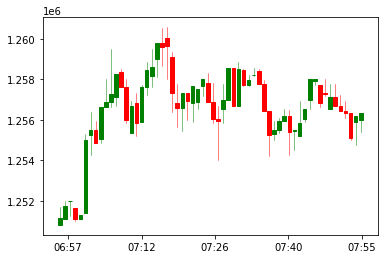

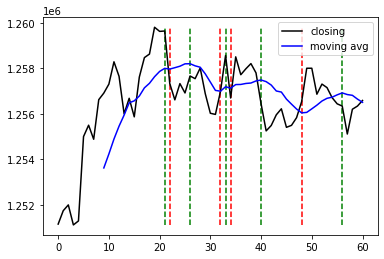

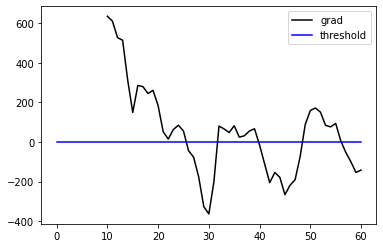

In [4]:
# シミュレータ環境
date_now = dt.datetime.now() + dt.timedelta(minutes=-60)
for min in range(60):
    designated_time = date_now + dt.timedelta(minutes=-(59-min))
    main(designated_time, 1)
exec_buy_sell(api, plot, date_now)

In [31]:
merge_df = pd.DataFrame()
merge_df["close"] = val_df["close"]
merge_df["title"] = hist_df["title"]
merge_df["total"] = hist_df["total"]
merge_df["yen"] = hist_df["yen"]
merge_df["btc"] = hist_df["btc"]
merge_df.head()

,close,title,total,yen,btc
0,1251157,NaN,NaN,NaN,NaN
1,1251745,NaN,NaN,NaN,NaN
2,1251999,NaN,NaN,NaN,NaN
3,1251121,NaN,NaN,NaN,NaN
4,1251296,NaN,NaN,NaN,NaN


In [6]:
# 本番環境
# while True:
#     main(dt.datetime.now(), 60/2)

In [16]:
val_df

,time,open,high,low,close
0,1597355760,1250819,1251702,1250819,1251157
1,1597355820,1251121,1252000,1251121,1251745
2,1597355880,1251999,1252000,1251265,1251999
3,1597355940,1251657,1251657,1251000,1251121
4,1597356000,1251121,1251296,1251121,1251296
...,...,...,...,...,...
56,1597359120,1256438,1256938,1256114,1256339
57,1597359180,1256339,1256339,1255000,1255112
58,1597359240,1255890,1256200,1254780,1256200
59,1597359300,1255978,1256339,1255399,1256339


In [35]:
hist_df = simulator.get_record_hist()
hist_df.head()

,title,total,yen,btc
